# Import Libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from scipy.special import boxcox1p

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVC

from utils import check_metrics

import xgboost as xgb

pd.options.display.float_format = '{:,.4f}'.format

# Import data

In [35]:
df = pd.read_csv('data/Cleaned_data_for_modelling.csv', index_col='id')
df

,price,listing_title,sqft,bedrooms,bathrooms,address,listing_tags,tenure,url,state,pool,fitness,balcony,log_price,sqft_boxcox,landed_high_rise,district_enc
id,,,,,,,,,,,,,,,,,
1,"1,288,000.0000",ECO SANCTUARY,"2,622.0000",5.0000,5.0000,"Lot 41296 Persiaran Eco Sanctuary, Telok Pangl...",2-storey Terraced House,Leasehold,https://www.propertyguru.com.my/property-listi...,Selangor,True,True,True,14.0686,6.4037,landed,kuala langat
2,"1,600,000.0000",Kinrara Residence - 3 Storey Link House,"1,847.0000",5.0000,5.0000,"Jalan DU 4/7, Puchong, Selangor",3-storey Terraced House,Leasehold,https://www.propertyguru.com.my/property-listi...,Selangor,True,False,True,14.2855,6.1731,landed,sepang
3,"400,000.0000",Menara Mutiara,"1,100.0000",3.0000,2.0000,"Jalan 11 Off Jalan 1, Taman TAR, Ampang Jaya, ...",Condominium,Leasehold,https://www.propertyguru.com.my/property-listi...,Selangor,False,False,True,12.8992,5.8239,high-rise,gombak
4,"665,000.0000","Ellis, Bandar Bukit Raja","1,535.0000",4.0000,3.0000,"Jalan Sumazau 3/KU5, Bandar Bukit Raja, Klang,...",2-storey Terraced House,Freehold,https://www.propertyguru.com.my/property-listi...,Selangor,False,False,False,13.4075,6.0496,landed,klang
5,"599,000.0000",Seri Bangi Seksyen 8 Bandar Baru Bangi,"1,900.0000",4.0000,3.0000,"Jalan 8/35, Bandar Baru Bangi, Bangi, Selangor",2-storey Terraced House,Leasehold,https://www.propertyguru.com.my/property-listi...,Selangor,True,False,False,13.3030,6.1919,landed,hulu langat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2663,"1,250,000.0000",Xania Puchong,"3,800.0000",5.0000,5.0000,"Cyberjaya, Selangor",Terraced House,Leasehold,https://www.propertyguru.com.my/property-listi...,Selangor,True,True,False,14.0387,6.6431,landed,sepang
2664,"980,000.0000",Tenderfields @ Eco Majestic,"2,750.0000",5.0000,5.0000,"No. 1, Lingkaran Eco Majestic, Eco Majestic, S...",Cluster House,Freehold,https://www.propertyguru.com.my/property-listi...,Selangor,True,True,False,13.7953,6.4347,landed,hulu langat
2665,"880,000.0000",Lumi Tropicana,"1,084.0000",3.0000,2.0000,"Lumi Tropicana, Persiaran Tropicana, Tropicana...",Service Residence,Leasehold,https://www.propertyguru.com.my/property-listi...,Selangor,True,True,False,13.6877,5.8139,high-rise,petaling


In [92]:
df[df.price == df.price.min()]

,price,listing_title,sqft,bedrooms,bathrooms,address,listing_tags,tenure,url,state,pool,fitness,balcony,log_price,sqft_boxcox,landed_high_rise,district_enc
id,,,,,,,,,,,,,,,,,
155,"88,000.0000",RM88K 2R2B Freehold 【Free 2 Year Maintanence +...,889.0000,2.0000,2.0000,"Cyberjaya, Selangor",Condominium,Freehold,https://www.propertyguru.com.my/property-listi...,Selangor,False,False,False,11.3851,5.6776,high-rise,sepang


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2552 entries, 1 to 2667
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2552 non-null   float64
 1   listing_title     2552 non-null   object 
 2   sqft              2552 non-null   float64
 3   bedrooms          2552 non-null   float64
 4   bathrooms         2552 non-null   float64
 5   address           2552 non-null   object 
 6   listing_tags      2552 non-null   object 
 7   tenure            2552 non-null   object 
 8   url               2552 non-null   object 
 9   state             2552 non-null   object 
 10  pool              2552 non-null   bool   
 11  fitness           2552 non-null   bool   
 12  balcony           2552 non-null   bool   
 13  log_price         2552 non-null   float64
 14  sqft_boxcox       2552 non-null   float64
 15  landed_high_rise  2552 non-null   object 
 16  district_enc      2552 non-null   object 


# Processed Data

In [37]:
target = 'log_price'
y = df[target]
X = df.drop(columns = ['price','log_price', 'listing_title', 'state','address','url','sqft'])

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2552 entries, 1 to 2667
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedrooms          2552 non-null   float64
 1   bathrooms         2552 non-null   float64
 2   listing_tags      2552 non-null   object 
 3   tenure            2552 non-null   object 
 4   pool              2552 non-null   bool   
 5   fitness           2552 non-null   bool   
 6   balcony           2552 non-null   bool   
 7   sqft_boxcox       2552 non-null   float64
 8   landed_high_rise  2552 non-null   object 
 9   district_enc      2552 non-null   object 
dtypes: bool(3), float64(3), object(4)
memory usage: 167.0+ KB


# Modelling

## Linear Models

In [39]:
# OneHotEncoding
X = pd.get_dummies(X)

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2552 entries, 1 to 2667
Data columns (total 45 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   bedrooms                                2552 non-null   float64
 1   bathrooms                               2552 non-null   float64
 2   pool                                    2552 non-null   bool   
 3   fitness                                 2552 non-null   bool   
 4   balcony                                 2552 non-null   bool   
 5   sqft_boxcox                             2552 non-null   float64
 6   listing_tags_1-storey Terraced House    2552 non-null   uint8  
 7   listing_tags_1.5-storey Terraced House  2552 non-null   uint8  
 8   listing_tags_2-storey Terraced House    2552 non-null   uint8  
 9   listing_tags_2.5-storey Terraced House  2552 non-null   uint8  
 10  listing_tags_3-storey Terraced House    2552 non-null   uint

In [41]:
X.describe()

,bedrooms,bathrooms,sqft_boxcox,listing_tags_1-storey Terraced House,listing_tags_1.5-storey Terraced House,listing_tags_2-storey Terraced House,listing_tags_2.5-storey Terraced House,listing_tags_3-storey Terraced House,listing_tags_4.5-storey Terraced House,listing_tags_Apartment,...,landed_high_rise_landed,district_enc_gombak,district_enc_hulu langat,district_enc_hulu selangor,district_enc_klang,district_enc_kuala langat,district_enc_kuala selangor,district_enc_petaling,district_enc_sabak bernam,district_enc_sepang
count,"2,552.0000","2,552.0000","2,552.0000","2,552.0000","2,552.0000","2,552.0000","2,552.0000","2,552.0000","2,552.0000","2,552.0000",...,"2,552.0000","2,552.0000","2,552.0000","2,552.0000","2,552.0000","2,552.0000","2,552.0000","2,552.0000","2,552.0000","2,552.0000"
mean,4.0780,3.5216,6.2110,0.0263,0.0031,0.3742,0.0180,0.0392,0.0008,0.0498,...,0.7210,0.1540,0.2132,0.0039,0.0658,0.0157,0.0086,0.3785,0.0008,0.1595
std,1.2402,1.5411,0.4451,0.1599,0.0559,0.4840,0.1331,0.1941,0.0280,0.2175,...,0.4486,0.3610,0.4096,0.0625,0.2480,0.1242,0.0925,0.4851,0.0280,0.3662
min,0.0000,0.0000,4.2151,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,3.0000,2.0000,5.9000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,4.0000,3.0000,6.2259,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,5.0000,4.0000,6.4914,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,...,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
max,10.0000,9.0000,7.4115,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


We can see that the scale of each features are very different.

In [42]:
from sklearn.preprocessing import StandardScaler, Normalizer

scaler = StandardScaler()
cols = X.columns
X[cols] = scaler.fit_transform(X[cols])

In machine learning, feature scaling refers to putting the feature values into the same range. Scaling is extremely important for the algorithms considering the distances between observations like k-nearest neighbors. On the other hand, rule-based algorithms like decision trees are not affected by feature scaling.

A technique to scale data is to squeeze it into a predefined interval. In normalization, we map the minimum feature value to 0 and the maximum to 1. Hence, the feature values are mapped into the [0, 1] range:

  \[z = \frac{x - min(x)}{max(x) - min(x)}\]
  
In standardization, we don’t enforce the data into a definite range. Instead, we transform to have a mean of 0 and a standard deviation of 1:

  \[z = \frac{x - \mu}{\sigma}\]

It not only helps with scaling but also centralizes the data.

In general, standardization is more suitable than normalization in most cases.

In [43]:
X.describe()

,bedrooms,bathrooms,pool,fitness,balcony,sqft_boxcox,listing_tags_1-storey Terraced House,listing_tags_1.5-storey Terraced House,listing_tags_2-storey Terraced House,listing_tags_2.5-storey Terraced House,...,landed_high_rise_landed,district_enc_gombak,district_enc_hulu langat,district_enc_hulu selangor,district_enc_klang,district_enc_kuala langat,district_enc_kuala selangor,district_enc_petaling,district_enc_sabak bernam,district_enc_sepang
count,"2,552.0000","2,552.0000","2,552.0000","2,552.0000","2,552.0000","2,552.0000","2,552.0000","2,552.0000","2,552.0000","2,552.0000",...,"2,552.0000","2,552.0000","2,552.0000","2,552.0000","2,552.0000","2,552.0000","2,552.0000","2,552.0000","2,552.0000","2,552.0000"
mean,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,...,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000
std,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,...,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002
min,-3.2889,-2.2855,-0.7387,-0.6690,-0.6100,-4.4850,-0.1642,-0.0561,-0.7733,-0.1355,...,-1.6076,-0.4266,-0.5205,-0.0627,-0.2655,-0.1262,-0.0933,-0.7804,-0.0280,-0.4356
25%,-0.8694,-0.9875,-0.7387,-0.6690,-0.6100,-0.6987,-0.1642,-0.0561,-0.7733,-0.1355,...,-1.6076,-0.4266,-0.5205,-0.0627,-0.2655,-0.1262,-0.0933,-0.7804,-0.0280,-0.4356
50%,-0.0629,-0.3385,-0.7387,-0.6690,-0.6100,0.0335,-0.1642,-0.0561,-0.7733,-0.1355,...,0.6221,-0.4266,-0.5205,-0.0627,-0.2655,-0.1262,-0.0933,-0.7804,-0.0280,-0.4356
75%,0.7436,0.3105,1.3537,1.4948,1.6395,0.6301,-0.1642,-0.0561,1.2932,-0.1355,...,0.6221,-0.4266,-0.5205,-0.0627,-0.2655,-0.1262,-0.0933,1.2813,-0.0280,-0.4356
max,4.7761,3.5555,1.3537,1.4948,1.6395,2.6977,6.0901,17.8326,1.2932,7.3809,...,0.6221,2.3439,1.9212,15.9437,3.7670,7.9246,10.7238,1.2813,35.7071,2.2957


In [44]:
lr = LinearRegression(n_jobs = -1)
lr

LinearRegression(n_jobs=-1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [46]:
lr.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [47]:
scores = check_metrics(lr, X_train, X_valid, y_train, y_valid)

MAE train score : 0.2715645283896678
MAE train score : 0.2715645283896678
MSE train score : 0.12463944559506372
MSE valid score : 0.14040043659143941
RMSE train score : 0.3530431214385344
RMSE valid score : 0.3747004624916273
R2 train score : 0.7673497110174288
R2 valid score : 0.7499502501888439


## Try regularised models

Best alpha : 10.0
Try again for more precision with alphas centered around 10.0
Best alpha : 19.0
MAE train score : 0.27179938306937224
MAE train score : 0.27179938306937224
MSE train score : 0.12402098248998455
MSE valid score : 0.13961313060634994
RMSE train score : 0.3521661291066825
RMSE valid score : 0.3736484050633027
R2 train score : 0.7685041258131202
R2 valid score : 0.7513524229268769


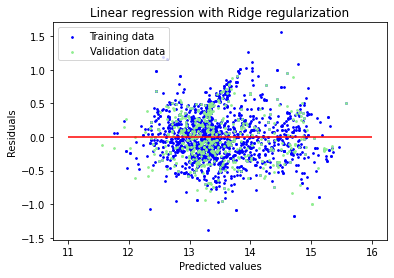

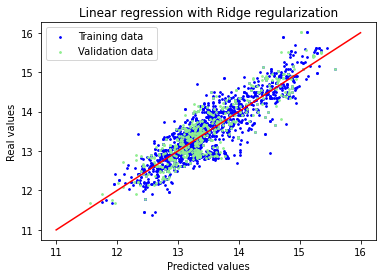

Ridge picked 45 features and eliminated the other 0 features


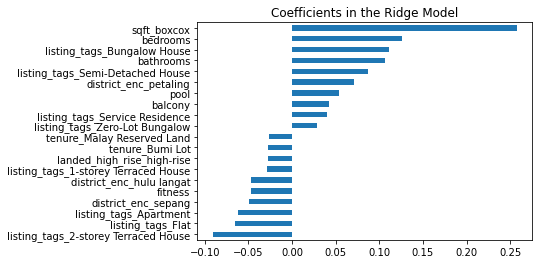

In [48]:
# Ridge
ridge = RidgeCV(alphas = [0.001, 0.01, 0.1, 1, 5, 10])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

if alpha > 1:
    alphas = np.arange(alpha, alpha + 10, 1)
else:
    alphas = np.arange(alpha, alpha * 10, alpha)
    
print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = alphas,
                cv = 10)

ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

scores = check_metrics(ridge, X_train, X_valid, y_train, y_valid)

y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "o", s=3, label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "o", s=3, label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 11, xmax = 16, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "o", s = 3, label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "o", s = 3, label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([11,16], [11,16], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

Best alpha : 0.001
Try again for more precision with alphas centered around 0.001
Best alpha : 0.002
MAE train score : 0.2721816022206151
MAE train score : 0.2721816022206151
MSE train score : 0.12417793791359114
MSE valid score : 0.1389131284252005
RMSE train score : 0.3523889015187498
RMSE valid score : 0.372710515581732
R2 train score : 0.7682111549603928
R2 valid score : 0.7525991097215414


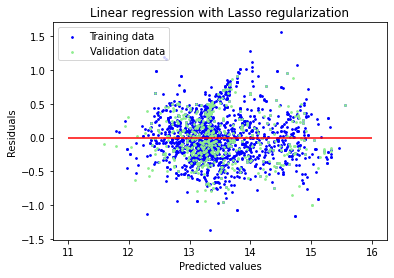

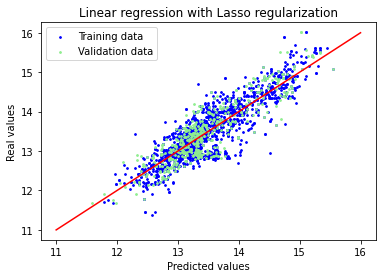

Lasso picked 39 features and eliminated the other 6 features


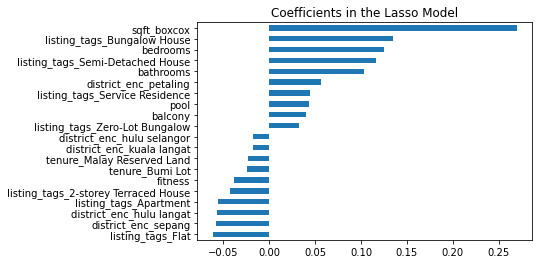

In [49]:
# 3* Lasso
from sklearn.linear_model import LassoCV

lasso = LassoCV(alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1,1, 10], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = np.arange(alpha, alpha * 10, alpha), 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

scores = check_metrics(lasso, X_train, X_valid, y_train, y_valid)

y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "o", s=3, label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "o", s=3, label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 11, xmax = 16, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "o", s=3,label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "o", s=3, label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([11,16], [11,16], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

In [50]:
coefs[coefs == 0]

listing_tags_3-storey Terraced House   -0.0000
listing_tags_Condominium               -0.0000
listing_tags_Penthouse                 -0.0000
listing_tags_Twin Villa                -0.0000
tenure_Freehold                        -0.0000
district_enc_gombak                     0.0000
dtype: float64

In [51]:
joblib.dump(lasso, 'lasso_std_scale.joblib')

['lasso_std_scale.joblib']

https://www.kaggle.com/code/juliencs/a-study-on-regression-applied-to-the-ames-dataset/notebook

## Tune tree-based model with OrdinalEncoder

In [52]:
target = 'log_price'
y = df[target]
X = df.drop(columns = ['price','log_price', 'listing_title', 'state','address','url','sqft'])

In [53]:
X

,bedrooms,bathrooms,listing_tags,tenure,pool,fitness,balcony,sqft_boxcox,landed_high_rise,district_enc
id,,,,,,,,,,
1,5.0000,5.0000,2-storey Terraced House,Leasehold,True,True,True,6.4037,landed,kuala langat
2,5.0000,5.0000,3-storey Terraced House,Leasehold,True,False,True,6.1731,landed,sepang
3,3.0000,2.0000,Condominium,Leasehold,False,False,True,5.8239,high-rise,gombak
4,4.0000,3.0000,2-storey Terraced House,Freehold,False,False,False,6.0496,landed,klang
5,4.0000,3.0000,2-storey Terraced House,Leasehold,True,False,False,6.1919,landed,hulu langat
...,...,...,...,...,...,...,...,...,...,...
2663,5.0000,5.0000,Terraced House,Leasehold,True,True,False,6.6431,landed,sepang
2664,5.0000,5.0000,Cluster House,Freehold,True,True,False,6.4347,landed,hulu langat
2665,3.0000,2.0000,Service Residence,Leasehold,True,True,False,5.8139,high-rise,petaling


In [54]:
cols = ['listing_tags','tenure','pool','fitness','balcony','landed_high_rise','district_enc']

enc = OrdinalEncoder()

X[cols] = enc.fit_transform(X[cols])

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Adaboost

In [61]:
params = {
    'n_estimators': [50, 250,500,700],
    'learning_rate': [0.5,0.1,0.05, 0.025],
}


ada = AdaBoostRegressor(random_state=42)
adacv = GridSearchCV(ada, params, scoring = 'neg_mean_absolute_error', 
                      n_jobs=-1, cv = 5, verbose = 1, return_train_score=True)

In [62]:
adacv.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 0.1, 0.05, 0.025],
                         'n_estimators': [50, 250, 500, 700]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
results = pd.DataFrame(adacv.cv_results_)
results['mean_test_score'] = results['mean_test_score'] * -1
results['mean_train_score'] = results['mean_train_score'] * -1
results = results[['mean_fit_time', 'param_n_estimators', 'param_learning_rate', 
                   'mean_test_score',
                   'mean_train_score','rank_test_score']]
results.sort_values('rank_test_score').head(5)

,mean_fit_time,param_n_estimators,param_learning_rate,mean_test_score,mean_train_score,rank_test_score
13,1.0636,250,0.0250,0.2980,0.2894,1
4,0.2147,50,0.1000,0.2986,0.2909,2
15,1.8208,700,0.0250,0.2990,0.2906,3
14,2.0444,500,0.0250,0.2991,0.2907,4
9,1.2259,250,0.0500,0.2999,0.2910,5


### RandomForest

In [64]:
params = {
    'n_estimators': [100,250,350,500],
    'max_depth': [10,15,20, 25,50]}


rf = RandomForestRegressor(n_jobs=-1, random_state=42)
rfcv = GridSearchCV(rf, params, scoring = 'neg_mean_absolute_error', 
                      n_jobs=-1, cv = 10, verbose = 1, return_train_score=True)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
rfcv.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20, 25, 50],
                         'n_estimators': [100, 250, 350, 500]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [67]:
results = pd.DataFrame(rfcv.cv_results_)
results['mean_test_score'] = results['mean_test_score'] * -1
results['mean_train_score'] = results['mean_train_score'] * -1
results = results[['mean_fit_time', 'param_n_estimators', 
                   'param_max_depth', 'mean_test_score',
                   'mean_train_score','rank_test_score']]
results.sort_values('rank_test_score')

,mean_fit_time,param_n_estimators,param_max_depth,mean_test_score,mean_train_score,rank_test_score
13,1.9781,250,25,0.1862,0.0755,1
17,1.8599,250,50,0.1863,0.0754,2
9,1.8817,250,20,0.1864,0.0760,3
14,2.5772,350,25,0.1864,0.0753,4
18,2.6733,350,50,0.1865,0.0753,5
10,2.6128,350,20,0.1866,0.0759,6
15,3.7010,500,25,0.1867,0.0754,7
19,3.5472,500,50,0.1867,0.0753,8
11,3.7957,500,20,0.1867,0.0760,9
8,0.7104,100,20,0.1867,0.0766,10


In [68]:
rf = RandomForestRegressor(max_depth=25, n_estimators = 350, random_state=42)

In [69]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, n_estimators=350, random_state=42)

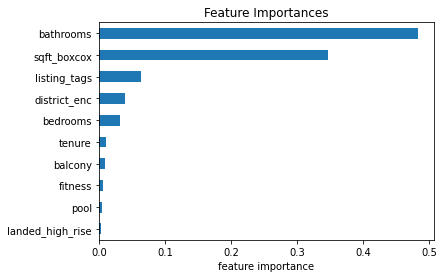

In [89]:
feat_imp = pd.Series(rf.feature_importances_, index = X.columns)
feat_imp.sort_values().plot(kind = 'barh')
plt.title('Feature Importances')
plt.xlabel('feature importance');

In [148]:
joblib.dump(rfcv, 'rf_no_scale.joblib')

['rf_no_scale.joblib']

## XGBoost

What is xgboost?
- an implementation of Gradient Boosting Decision Trees

We go through cycles that repeatedly builds new models and combines them into an ensemble model. We start the cycle by calculating the errors for each observation in the dataset. We then build a new model to predict those. We add predictions from this error-predicting model to the "ensemble of models."

To make a prediction, we add the predictions from all previous models. We can use these predictions to calculate new errors, build the next model, and add it to the ensemble.

There's one piece outside that cycle. We need some base prediction to start the cycle. In practice, the initial predictions can be pretty naive. Even if it's predictions are wildly inaccurate, subsequent additions to the ensemble will address those errors.

XGBoost has a few parameters that can dramatically affect your model's accuracy and training speed. The first parameters you should understand are:

n_estimators and early_stopping_rounds
n_estimators specifies how many times to go through the modeling cycle described above.

In the underfitting vs overfitting graph, n_estimators moves you further to the right. Too low a value causes underfitting, which is inaccurate predictions on both training data and new data. Too large a value causes overfitting, which is accurate predictions on training data, but inaccurate predictions on new data (which is what we care about). You can experiment with your dataset to find the ideal. Typical values range from 100-1000, though this depends a lot on the learning rate discussed below.

The argument early_stopping_rounds offers a way to automatically find the ideal value. Early stopping causes the model to stop iterating when the validation score stops improving, even if we aren't at the hard stop for n_estimators. It's smart to set a high value for n_estimators and then use early_stopping_rounds to find the optimal time to stop iterating.

Since random chance sometimes causes a single round where validation scores don't improve, you need to specify a number for how many rounds of straight deterioration to allow before stopping. early_stopping_rounds = 5 is a reasonable value. Thus we stop after 5 straight rounds of deteriorating validation scores.

Here's a subtle but important trick for better XGBoost models:

Instead of getting predictions by simply adding up the predictions from each component model, we will multiply the predictions from each model by a small number before adding them in. This means each tree we add to the ensemble helps us less. In practice, this reduces the model's propensity to overfit.

So, you can use a higher value of n_estimators without overfitting. If you use early stopping, the appropriate number of trees will be set automatically.

In general, a small learning rate (and large number of estimators) will yield more accurate XGBoost models, though it will also take the model longer to train since it does more iterations through the cycle.

In [73]:
target = 'log_price'
y = df[target]
X = df.drop(columns = ['price','log_price', 'listing_title', 'state','address','url','sqft'])

cols = ['listing_tags','tenure','pool','fitness','balcony','landed_high_rise','district_enc']

enc = OrdinalEncoder()

X[cols] = enc.fit_transform(X[cols])

In [74]:
params = {
    'n_estimators': [50,100,200,300],
    'learning_rate': [0.1,0.2,0.5,0.7,1],
    'max_depth': [5,10,30,50,70]
}

xg = xgb.XGBRegressor(n_jobs = -1, random_state = 42)

gridcv = GridSearchCV(xg, params, scoring = 'neg_mean_absolute_error', 
                      n_jobs=-1, cv = 5, verbose = 1, return_train_score=True)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
gridcv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=-1, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 0.7, 1],
                         'max_depth': [5, 10, 30, 50, 70],
                         'n_estimators': [50, 100, 200, 300]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [77]:
results = pd.DataFrame(gridcv.cv_results_)
results['mean_test_score'] = results['mean_test_score'] * -1
results['mean_train_score'] = results['mean_train_score'] * -1
results = results[['mean_fit_time', 'param_n_estimators', 
                   'param_learning_rate', 'param_max_depth',
                   'mean_test_score',
                   'mean_train_score','rank_test_score']]

In [78]:
results.loc[results.rank_test_score == 1]

,mean_fit_time,param_n_estimators,param_learning_rate,param_max_depth,mean_test_score,mean_train_score,rank_test_score
10,2.0421,200,0.1000,30,0.1676,0.0146,1
11,1.8486,300,0.1000,30,0.1676,0.0146,1


In [83]:
xg_final = xgb.XGBRegressor(n_estimators = 200, max_depth = 30, learning_rate = 0.1, n_jobs = -1, random_state = 42)

In [84]:
xg_final.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=30, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [85]:
joblib.dump(xg_final, 'xgboost_best.joblib')

['xgboost_best.joblib']

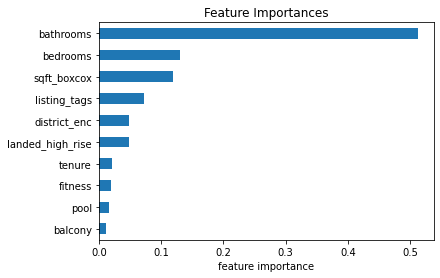

In [88]:
feat_imp_xgb = pd.Series(xg_final.feature_importances_, index = X.columns)
feat_imp_xgb.sort_values().plot(kind = 'barh')
plt.title('Feature Importances')
plt.xlabel('feature importance');

# Prediction

In [149]:
model = joblib.load('models/rf_no_scale.joblib')

In [150]:
input_data = pd.DataFrame({
    'bedrooms': 2,
    'bathrooms':2,
    'listing_tags': 'Condominium',
    'tenure': 'Freehold',
    'pool': False,
    'fitness': False,
    'balcony': False,
    'sqft': 8300,
    'landed_high_rise':'high-rise',
    'district_enc':'sepang',
}, index=[0])

input_data

,bedrooms,bathrooms,listing_tags,tenure,pool,fitness,balcony,sqft,landed_high_rise,district_enc
0,2,2,Condominium,Freehold,False,False,False,8300,high-rise,sepang


In [151]:
lam = -0.054377581982923306
input_data['sqft_boxcox'] = boxcox1p(input_data['sqft'], lam)
input_data.drop(columns = 'sqft', inplace = True)

cols = ['listing_tags','tenure','pool','fitness','balcony','landed_high_rise','district_enc']

input_data[cols] = enc.transform(input_data[cols])

input_data = input_data[X.columns]

print('Predicted House Price: RM {:,.0f}'.format(np.exp(model.predict(input_data)[0])))

Predicted House Price: RM 1,423,052


In [152]:
input_data

,bedrooms,bathrooms,listing_tags,tenure,pool,fitness,balcony,sqft_boxcox,landed_high_rise,district_enc
0,2,2,9.0000,2.0000,0.0000,0.0000,0.0000,7.1318,0.0000,8.0000
